In [1]:
import pandas as pd

In [2]:
# Importing order_details_table
df_order_details =pd.read_csv(r"C:\Users\ADMIN\Downloads\Pizza+Place+Sales\pizza_sales\order_details.csv")
df_order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [3]:
# Importing orders_table
df_orders = pd.read_csv(r"C:\Users\ADMIN\Downloads\Pizza+Place+Sales\pizza_sales\orders.csv")
df_orders .head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [4]:
# Importing pizza_types table
df_pizza_types =pd.read_csv(r"C:\Users\ADMIN\Downloads\Pizza+Place+Sales\pizza_sales\pizza_types.csv",encoding ='latin1')
df_pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [5]:
# Importing pizza_table
df_pizza = pd.read_csv(r"C:\Users\ADMIN\Downloads\Pizza+Place+Sales\pizza_sales\pizzas.csv")
df_pizza.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [6]:
# Merging the four tables step by step
Single_data_frame = pd.merge(df_order_details,df_pizza, on ='pizza_id',how = 'inner')
Single_data_frame.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00


In [7]:
Single_data_frame2= pd.merge(Single_data_frame,df_pizza_types, on ='pizza_type_id',how = 'inner')
Single_data_frame2.head() 

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [8]:
final_data_frame= pd.merge(Single_data_frame2,df_orders, on ='order_id',how = 'inner')
final_data_frame.head() 

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40


In [9]:
# Checking for null values
final_data_frame.isna().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
date                0
time                0
dtype: int64

In [10]:
# Checking for duplicates
final_data_frame.duplicated().sum()

np.int64(0)

In [11]:
# Checking the data type for each column
final_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   pizza_type_id     48620 non-null  object 
 5   size              48620 non-null  object 
 6   price             48620 non-null  float64
 7   name              48620 non-null  object 
 8   category          48620 non-null  object 
 9   ingredients       48620 non-null  object 
 10  date              48620 non-null  object 
 11  time              48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


# Questions

In [12]:
# 1 What is the total revenue/sales?
# Adding revenue column
final_data_frame['revenue'] = final_data_frame['quantity']*final_data_frame['price']
final_data_frame.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,revenue
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,16.00


In [13]:
# Suming the revenue column
total_revenue = final_data_frame['revenue'].sum()
print(f"The total_revenue is ${total_revenue:,.2f}")

The total_revenue is $817,860.05


Insight :The total revenue generated for the year is $817,860.05

In [14]:
#2 What is the total quantity sold?
total_quantity = final_data_frame['quantity'].sum()
print(f"The total_quantity sold is {total_quantity}")

The total_quantity sold is 49574


Insight : The total quantity of pizza sold for the year is  49574

In [15]:
#3 Find the total orders
total_orders = final_data_frame['order_id'].nunique()
print(f"the total order of pizza is {total_orders}")

the total order of pizza is 21350


Insight: The total order of pizza made for the year is 21350 and this shows that on average customers are ordering more that two pizzas per transaction 

In [16]:
#4 How many pizza types do the sell?
total_pizza_types = final_data_frame['name'].nunique()
print(f" The number of pizza types available are {total_pizza_types}")

 The number of pizza types available are 32


Insight: From the result the menu comprises about 32 different pizza types showing menu diversity,however the sales performance of each pizza needs to be properly evaluated

In [17]:
#5 What is the average price for the pizzas?
Average_price = final_data_frame['price'].mean()
print(f"The average price is ${Average_price:,.2f}")

The average price is $16.49


Insight: The average price for the pizza is $16.49 which therefore implies that if a new pizza is added to the menu it needs to be priced within this range to maintain customer consistency.

In [18]:
# 6 What are the peak hour of sales?
# Converting time column from object to date time
final_data_frame['time'] = pd.to_datetime(final_data_frame['time'],format = '%H:%M:%S').dt.time
final_data_frame['time'] 

0        11:38:36
1        11:57:40
2        11:57:40
3        11:57:40
4        11:57:40
           ...   
48615    21:23:10
48616    21:23:10
48617    21:23:10
48618    22:09:54
48619    23:02:05
Name: time, Length: 48620, dtype: object

In [19]:
# Extracting hour from time
final_data_frame['hour'] = pd.to_datetime(final_data_frame['time'],format = '%H:%M:%S').dt.hour
final_data_frame['hour']

0        11
1        11
2        11
3        11
4        11
         ..
48615    21
48616    21
48617    21
48618    22
48619    23
Name: hour, Length: 48620, dtype: int32

In [20]:
# Grouping the number of orders by hour
hours_of_sales = final_data_frame.groupby('hour')['order_id'].nunique().sort_values(ascending = False)
print (hours_of_sales)

hour
12    2520
13    2455
18    2399
17    2336
19    2009
16    1920
20    1642
14    1472
15    1468
11    1231
21    1198
22     663
23      28
10       8
9        1
Name: order_id, dtype: int64


Insight:The peak hours of sales is the 12th hour followed by 13th hour with a total order of 2520 and 2455 respectively.Therefore there should be enough pizzas available at this time to avoid shortage and sufficient staff should be made available to handle the orders

In [21]:
#7 Find the total sales made on each day of the week.Which day of the week is sales the most?
# Converting the date column to  date  time format
final_data_frame['date'] = pd. to_datetime(final_data_frame['date'])
final_data_frame['date'] 

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
48615   2015-12-31
48616   2015-12-31
48617   2015-12-31
48618   2015-12-31
48619   2015-12-31
Name: date, Length: 48620, dtype: datetime64[ns]

In [22]:
# Creating and new column day name and extracting day name
final_data_frame['day_name'] = final_data_frame['date'].dt.day_name()
final_data_frame.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,revenue,hour,day_name
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36,13.25,11,Thursday
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40,16.00,11,Thursday
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40,18.50,11,Thursday
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40,20.75,11,Thursday
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40,16.00,11,Thursday


In [23]:
# calculating the total sales for each day of the week
daily_sales = final_data_frame.groupby('day_name')['revenue'].sum().sort_values(ascending = False)
print(daily_sales)

day_name
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: revenue, dtype: float64


Insight: The day of the week with the highest sales is Friday with a revenue  of $136,073.90 which shows that customers are more likely to order pizza over the weekend compared to other days and this can be addressed by introducing promos or discount during the week

In [24]:
#8 Find the top 5 best selling pizza
Top_5_pizzas = final_data_frame.groupby('name')['quantity'].sum().sort_values(ascending=False)
Top_5_pizzas.head()

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

Insight:The Classic Deluxe Pizza is the top selling pizza followed by The Barbecue Chicken Pizza.Further research can be done to find out to know why the customer base prefers these and the availabilty of ingredients for these specific pizza types should be prioritized in the inventory to avoid shortage

In [25]:
#9 Find the sales made in each month.Any noticeable trend?
# Extract month from the date column and calculate sales in each month
final_data_frame['month'] = final_data_frame['date'].dt.month_name()
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
final_data_frame['month'] = pd.Categorical(final_data_frame['month'],categories = month_order,ordered=True)
monthly_sales = final_data_frame.groupby('month',observed = False)['revenue'].sum()
print (monthly_sales)

month
January      69793.30
February     65159.60
March        70397.10
April        68736.80
May          71402.75
June         68230.20
July         72557.90
August       68278.25
September    64180.05
October      64027.60
November     70395.35
December     64701.15
Name: revenue, dtype: float64


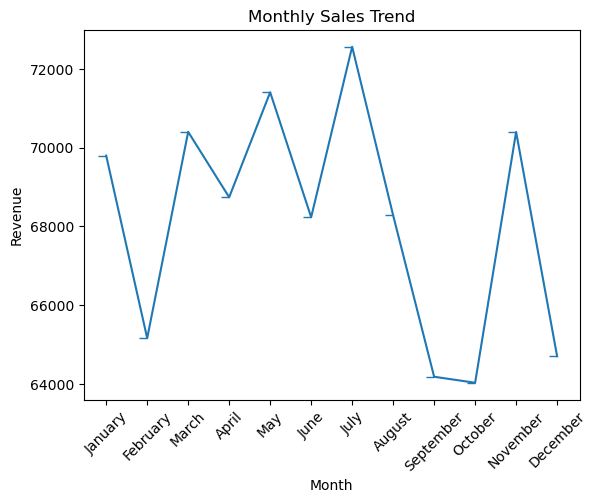

In [26]:
# Ploting a line graph to further depict the sales trend
import matplotlib.pyplot as plt
monthly_sales.plot(kind = 'line',marker = 0)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(range(12),month_order,rotation = 45)
plt.show()

Insight: On observing the monthly sales trend ,sales peak significantly in July and declines sharply between September and October making it the lowest sales period of the year.Management should try implementing promotions or dynamic pricing to boost sales during this period of low sales.

In [27]:
#10 Are there pizzas not doing well in the menu?
# Calculating and grouping by the total revnue and quantity ordered per pizza
pizza_performance = final_data_frame.groupby('name').agg({'quantity':'sum','revenue':'sum'})
low_performers= pizza_performance.sort_values(by = 'revenue',ascending = True)
low_performers.head(5)

,quantity,revenue
name,,
The Brie Carre Pizza,490,11588.50
The Green Garden Pizza,997,13955.75
The Spinach Supreme Pizza,950,15277.75
The Mediterranean Pizza,934,15360.50
The Spinach Pesto Pizza,970,15596.00


Insight : From the analysis The Brie Carre Pizza is the lowest performing pizza both in terms of quantity ordered  and revenue generated probably because it doesn't appeal to most customers or the price relative to the quality is high.I  recommend that the pizza be removed from the menu and the resources channelled to other high selling pizza on the menu or the product be entirely rebranded to see if its sales will improve.